# Gráficos de Barra

## Importar librerías requeridas
En la siguiente casilla importaremos los módulos necesarios para crear las visualizaciones.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

## Cargar dataset
El dataset corresponde a datos de propinas (tips en inglés)

In [5]:
df = pd.read_csv("dataset/tips.csv")
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.tail(5)

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [7]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Generar visualización de gráfico de barras

In [9]:
# El gráfico mostrará la propina promedio que se entrega en
# diferentes días de la semana

# Primero se generan los datos en el formato para graficarlos
# Por cada día de la semana se calculará el tip promedio
tip_por_dia = df.groupby('day')['tip'].mean()

print(tip_por_dia)

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64


Text(0, 0.5, 'Propina promedio')

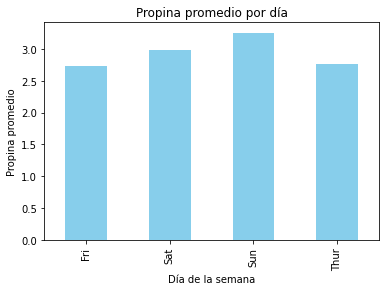

In [13]:
# Se grafica el array aneterior
ax = tip_por_dia.plot.bar(color = 'skyblue', title = 'Propina promedio por día')
ax.set_xlabel("Día de la semana")
ax.set_ylabel("Propina promedio")

## Generar visualización de gráfico de barras apiladas

In [14]:
# Para este gráfico se necesitan 2 categorías

# Por cada día de la semana se calcula la cantidad de mesas ocupadas
# Pero además separando por el sexo de la persona que hizo la reserva
MH_por_dia = df.groupby(['day','sex'])['tip'].count()

print(MH_por_dia)

day   sex   
Fri   Female     9
      Male      10
Sat   Female    28
      Male      59
Sun   Female    18
      Male      58
Thur  Female    32
      Male      30
Name: tip, dtype: int64


Text(0, 0.5, 'Cantidad de mesas')

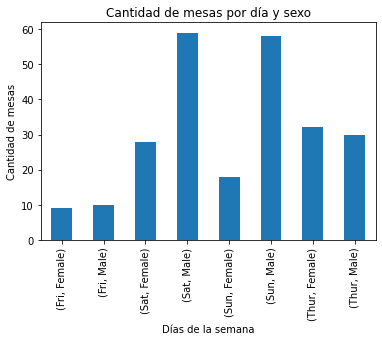

In [16]:
ax = MH_por_dia.plot.bar(stacked = True, title = "Cantidad de mesas por día y sexo")
ax.set_xlabel("Días de la semana")
ax.set_ylabel("Cantidad de mesas")

In [17]:
# El gráfico anterior no es exactamente lo que se esperaba, no se ve la agrupación

# Se debe pasar el dataset en formato "Ancho" (wide)
# para que los valores de la variable "sex" pasen a ser columnnas (pivot)

wide_MH_por_dia = MH_por_dia.unstack(level = -1)
print(wide_MH_por_dia)

sex   Female  Male
day               
Fri        9    10
Sat       28    59
Sun       18    58
Thur      32    30


Text(0, 0.5, 'Cantidad de mesas')

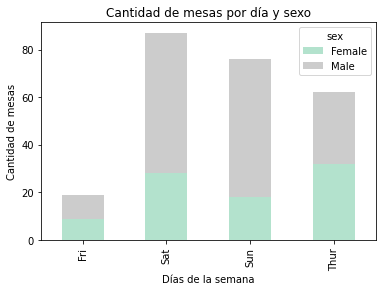

In [27]:
ax = wide_MH_por_dia.plot.bar(stacked = True, title = 'Cantidad de mesas por día y sexo', colormap = 'Pastel2')
ax.set_xlabel("Días de la semana")
ax.set_ylabel("Cantidad de mesas")